In [1]:
from re_eval_methods import *
from scipy.special import comb
from helper_functions import *
from Horn import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Define the binarizer and its lookup.

In [2]:
# country_file = 'data/country_list_continents.csv'
# occ_file = 'data/occupations_subset.csv'
# occ_file = 'data/occupationsNorge.csv'


age_file = 'data/ageValues.csv'
occ_file = 'data/occupationValues.csv'
cities_file = "data/cityValues.csv"
ethnicity_file = "data/ethnicityValues.csv"
binarizer = Binarizer(age_file, occ_file, cities_file, ethnicity_file)
# attributes = ['birth', 'occupation', "city", "ethnicity"]

# binarizer = Binarizer(5, occ_file)
# print(binarizer)
lookup = get_lookup(binarizer)
print(lookup)

['yngre enn 20', 'mellom 20 og 30', 'mellom 30 og 40', 'mellom 40 og 50', 'mellom 50 og 60', 'eldre enn 60', 'sykepleier', 'helsefagarbeider', 'adjunkt', 'barnehagelærer', 'mekaniker', 'elektriker', 'betongfagarbeider', 'sveiser', 'Oslo', 'Kristiansand', 'Stavanger', 'Bergen', 'Ålesund', 'Trondheim', 'Bodø', 'Tromsø', 'Asia', 'Afrika', 'Nord Amerika', 'Sør Amerika', 'Europa', 'Australia', 'kvinne', 'mann']


This cell saves the background to file.

In [3]:
dim = sum(binarizer.lengths.values()) + 2
V = define_variables(dim)

background = {
    (~(V[0] & V[1])),  (~(V[0] & V[2])),  (~(V[0] & V[3])),  (~(V[0] & V[4])),
    (~(V[1] & V[2])),  (~(V[1] & V[3])),  (~(V[1] & V[4])),  (~(V[2] & V[3])),
    (~(V[2] & V[4])),  (~(V[3] & V[4])),  (~(V[5] & V[6])),  (~(V[5] & V[7])),
    (~(V[5] & V[8])),  (~(V[5] & V[9])),  (~(V[5] & V[10])), (~(V[5] & V[11])),
    (~(V[5] & V[12])), (~(V[5] & V[13])), (~(V[6] & V[7])),  (~(V[6] & V[8])),
    (~(V[6] & V[9])),  (~(V[6] & V[10])), (~(V[6] & V[11])), (~(V[6] & V[12])),
    (~(V[6] & V[13])), (~(V[7] & V[8])),  (~(V[7] & V[9])),  (~(V[7] & V[10])),
    (~(V[7] & V[11])), (~(V[7] & V[12])), (~(V[7] & V[13])), (~(V[8] & V[9])),
    (~(V[8] & V[10])), (~(V[8] & V[11])), (~(V[8] & V[12])), (~(V[8] & V[13])),
    (~(V[9] & V[10])), (~(V[9] & V[11])), (~(V[9] & V[12])), (~(V[9] & V[13])),
    (~(V[10] & V[11])), (~(V[10] & V[12])), (~(V[10] & V[13])), (~(V[11] & V[12])),
    (~(V[11] & V[13])), (~(V[12] & V[13])), (~(V[14] & V[15])), (~(V[14] & V[16])),
    (~(V[14] & V[17])), (~(V[14] & V[18])), (~(V[14] & V[19])), (~(V[14] & V[20])),
    (~(V[14] & V[21])), (~(V[15] & V[16])), (~(V[15] & V[17])), (~(V[15] & V[18])),
    (~(V[15] & V[19])), (~(V[15] & V[20])), (~(V[15] & V[21])), (~(V[16] & V[17])),
    (~(V[16] & V[18])), (~(V[16] & V[19])), (~(V[16] & V[20])), (~(V[16] & V[21])),
    (~(V[17] & V[18])), (~(V[17] & V[19])), (~(V[17] & V[20])), (~(V[17] & V[21])),
    (~(V[18] & V[19])), (~(V[18] & V[20])), (~(V[18] & V[21])), (~(V[19] & V[20])),
    (~(V[19] & V[21])), (~(V[20] & V[21])), (~(V[22] & V[23])), (~(V[22] & V[24])),
    (~(V[22] & V[25])), (~(V[22] & V[26])), (~(V[22] & V[27])), (~(V[22] & V[28])),
    (~(V[22] & V[29])), (~(V[23] & V[24])), (~(V[23] & V[25])), (~(V[23] & V[26])),
    (~(V[23] & V[27])), (~(V[23] & V[28])), (~(V[23] & V[29])), (~(V[24] & V[25])),
    (~(V[24] & V[26])), (~(V[24] & V[27])), (~(V[24] & V[28])), (~(V[24] & V[29])),
    (~(V[25] & V[26])), (~(V[25] & V[27])), (~(V[25] & V[28])), (~(V[25] & V[29])),
    (~(V[26] & V[27])), (~(V[26] & V[28])), (~(V[26] & V[29])), (~(V[27] & V[28])),
    (~(V[27] & V[29])), (~(V[28] & V[29]))
}

with open('data/background.txt', 'wb') as f:
    pickle.dump(background, f)

# Single evaluation

In this section, one can evaluate a single experimental result by converting the rules and print them out. A single experimental result means, all runs of one experiment setup (10 for the lower EQ nubmers).

First, all rules from the file are loaded and converted into lists / dictionaries and concatenated into a list of all rules over all experiments.

In [4]:
""" Set the parameters for the desired experiment """

e = 1  # defines the number of experiments per setup
# lm = 'roberta-base'
lm = "bert-base-multilingual-cased"
eq = 10

In [5]:
experiments = range(1,e+1)
background = load_background()
all_negations = []
all_implications = []
for ex in experiments:
    h = load_rules(lm, eq, ex)
    all_rules = get_all_rules(h, background)
    (rules, negations, implications) = make_rule_lists(all_rules)
    all_negations = [*all_negations, *negations]
    all_implications = [*all_implications, *implications]

# print(all_implications)

Count the rules over all experiments and print them out. (This includes **all** implications).

In [6]:
negations_count = count_lists(all_negations)
implications_count = count_lists(all_implications)
# print(implications_count)
print_all_counted_rules(negations_count, implications_count, lookup)

0.100  :  not (elektriker & Bodø & Nord Amerika & mann & eldre enn 60 )
0.100  :  not (mekaniker & Bergen & Sør Amerika & mann & mellom 40 og 50 )
0.100  :  not (mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier )
0.100  :  not (betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60 )
0.100  :  mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier  ---> eldre enn 60
0.100  :  betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60  ---> Stavanger
0.100  :  betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60  ---> Sør Amerika
0.100  :  betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60  ---> Bodø
0.100  :  mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier  ---> Ålesund
0.100  :  mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier  ---> mellom 20 og 30
0.100  :  betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60  ---> adjunkt
0.100  :  mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier  ---> Europa
0.100  :  elektriker &

Do the same, but exclude implications that are derived from a negation.

In [7]:
relevant_implications = []
for rule in all_implications:
    if rule['body'] not in all_negations:
        relevant_implications.append(rule)
relevant_implications_count = count_lists(relevant_implications)
print_all_counted_rules(negations_count, relevant_implications_count, lookup)

0.100  :  not (elektriker & Bodø & Nord Amerika & mann & eldre enn 60 )
0.100  :  not (mekaniker & Bergen & Sør Amerika & mann & mellom 40 og 50 )
0.100  :  not (mellom 30 og 40 & Bodø & Sør Amerika & mann & sykepleier )
0.100  :  not (betongfagarbeider & Trondheim & Afrika & mann & eldre enn 60 )


Write them formatted to a file

In [9]:
filename_string = 'data/rule_extraction/' + lm + '_' + str(eq) +'.txt'
filename_latex = 'data/rule_extraction/' + lm + '_' + str(eq) +'_latex.txt'
for rule, count in sorted(negations_count, key=lambda rule: rule[1], reverse=True):
    rule_string = negation_to_string(rule, lookup)
    with open(filename_string, 'a', encoding="UTF-8") as f:
        line = "{:.3f}  :  {rule}".format(count/10, rule=rule_string)
        #print(line)
        f.write(line + '\n')
    with open(filename_latex, 'a', encoding="UTF-8") as f:
        line = "{} & {rule} \\\\".format(count, rule=negation_to_latex(rule, lookup))
        f.write(line + '\n')

for rule, count in sorted(relevant_implications_count, key=lambda rule: rule[1], reverse=True):
    rule_string = implication_to_string(rule, lookup)
    with open(filename_string, 'a') as f:
        line = "{:.3f}  :  {rule}".format(count/10, rule=rule_string)
        #print(line)
        f.write(line + '\n')
    with open(filename_latex, 'a') as f:
        line = "{} & {rule} \\\\".format(count, rule=implication_to_latex(rule, lookup))
        f.write(line + '\n')

Special sorting for the terminated runs

In [10]:
filename_string = 'data/rule_extraction/' + lm + '_' + str(eq) +'.txt'
filename_latex = 'data/rule_extraction/' + lm + '_' + str(eq) +'_latex.txt'
for rule in sorted(all_negations, key=lambda rule : len(rule)):
    rule_string = negation_to_string(rule, lookup)
    with open(filename_latex, 'a', encoding="UTF-8") as f:
        line = "${rule} \\\\".format(rule=negation_to_latex(rule, lookup))
        f.write(line + '\n')

for rule in sorted(relevant_implications, key=lambda rule : len(rule['body'])):
    rule_string = implication_to_string(rule, lookup)
    with open(filename_latex, 'a', encoding="UTF-8") as f:
        line = "${rule} \\\\".format(rule=implication_to_latex(rule, lookup))
        f.write(line + '\n')

# Single Runtime evaluation

Evaluates the runtime of a single experimental setup with its multiple runs (10 for up to 200 EQs).

In [11]:
""" Set the parameters for the desired experiment """

e = 1  # defines the number of experiments per setup
# lm = 'roberta-base'
lm = "bert-base-multilingual-cased"
# eq = 5000
eq = 30

In [12]:
experiments = range(1,e+1)
total_runtime = 0
df = pd.DataFrame(columns=['samples', 'runtime', 'iteration'])
for ex in experiments:
    data_dict = get_data_dict(lm, eq, ex)
    total_runtime = total_runtime + float(data_dict['data']['runtime'])
    sample_list = data_dict['data']['average_sample']
    sample_df = make_sample_df(sample_list, eq=0) ######################################### corrupt?
    df = pd.concat([df, sample_df])
total_runtime = total_runtime / len(experiments)
print("{lm} - {e} EQs:".format(lm=lm, e=e))
print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))

bert-base-multilingual-cased - 1 EQs:
	runtime average: 803.43 sec = 13.39 min = 0.22 h


C:\Users\Johnn\AppData\Local\Temp\ipykernel_14520\1794873820.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, sample_df])


In [13]:
print(df)

    samples     runtime  iteration
0       1.0    3.189478        1.0
1       1.0    1.663265        2.0
2       1.0    7.079230        3.0
3       1.0    1.520314        4.0
4       3.0    1.483061        5.0
5       4.0   14.491834        6.0
6       4.0   17.537827        7.0
7       2.0    4.739948        8.0
8       1.0   42.361751        9.0
9       1.0   30.439782       10.0
10      1.0   16.998739       11.0
11      1.0   21.083788       12.0
12      1.0   21.518759       13.0
13      3.0   24.227650       14.0
14      3.0   25.880178       15.0
15      3.0   25.408264       16.0
16      1.0   25.254319       17.0
17      1.0   26.858210       18.0
18      2.0   30.046823       19.0
19      1.0   32.906676       20.0
20      1.0   25.819557       21.0
21      4.0   35.027842       22.0
22      1.0   32.018939       23.0
23      2.0  167.381668       24.0
24      3.0   44.880505       25.0
25      4.0   17.788038       26.0
26      2.0   15.773778       27.0
27      1.0   44.565

Visualize the amount of samples per equivalence query and the average

<Axes: xlabel='iteration', ylabel='samples'>

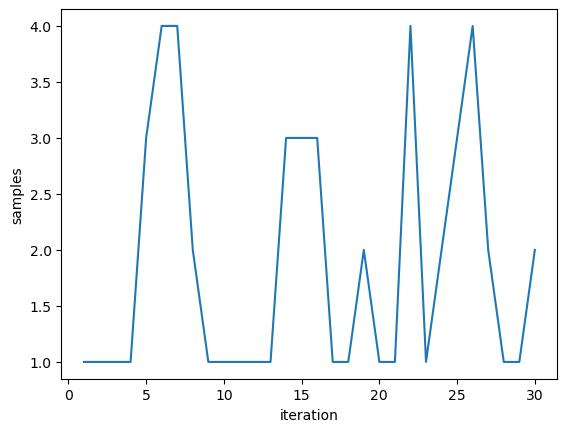

In [14]:
sns.lineplot(data=df, x='iteration', y='samples')

C:\Users\Johnn\AppData\Local\Temp\ipykernel_14520\1732325492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='iteration', y='samples', height=6, aspect=1.5, palette='colorblind')


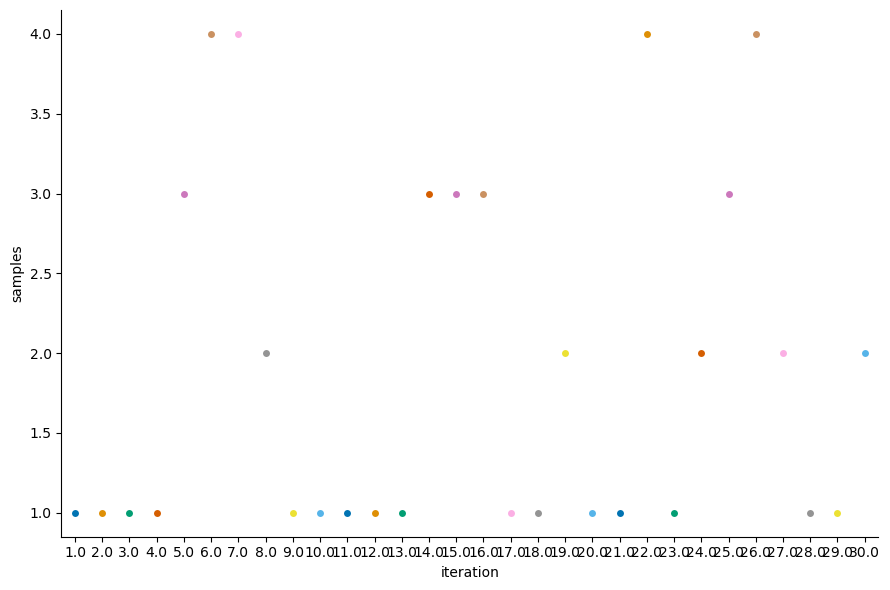

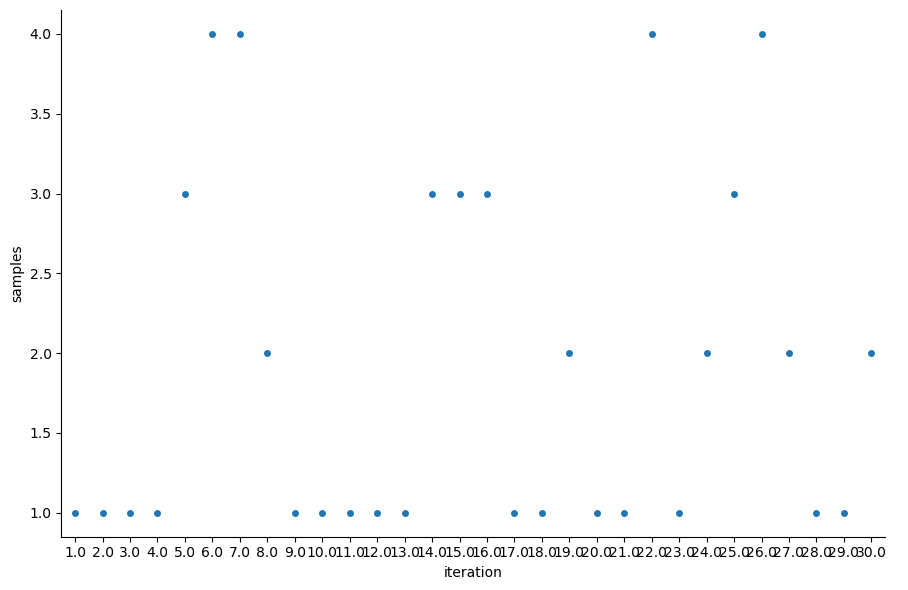

In [15]:
sns.catplot(data=df, x='iteration', y='samples', height=6, aspect=1.5, palette='colorblind')
sns.catplot(data=df.groupby('iteration', as_index=False)['samples'].mean(), x='iteration', y='samples', height=6, aspect=1.5)

And do a similar visualization for the average runtime at each equivalence query.

<Axes: xlabel='iteration', ylabel='runtime'>

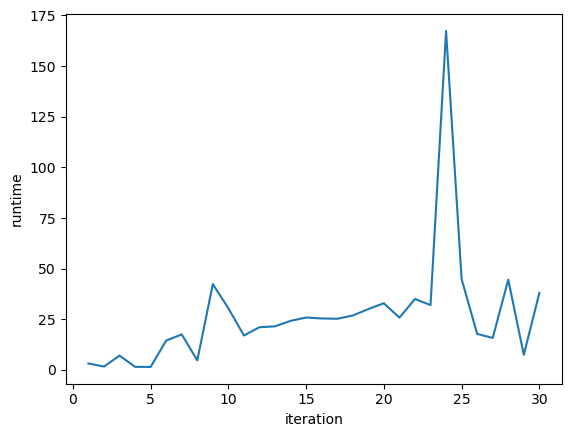

In [16]:
sns.lineplot(data=df, x='iteration', y='runtime')

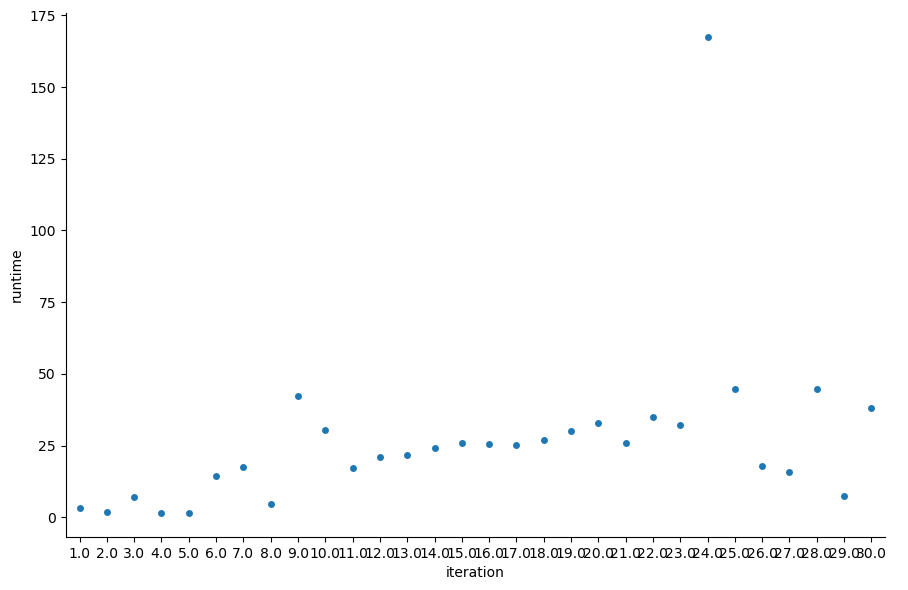

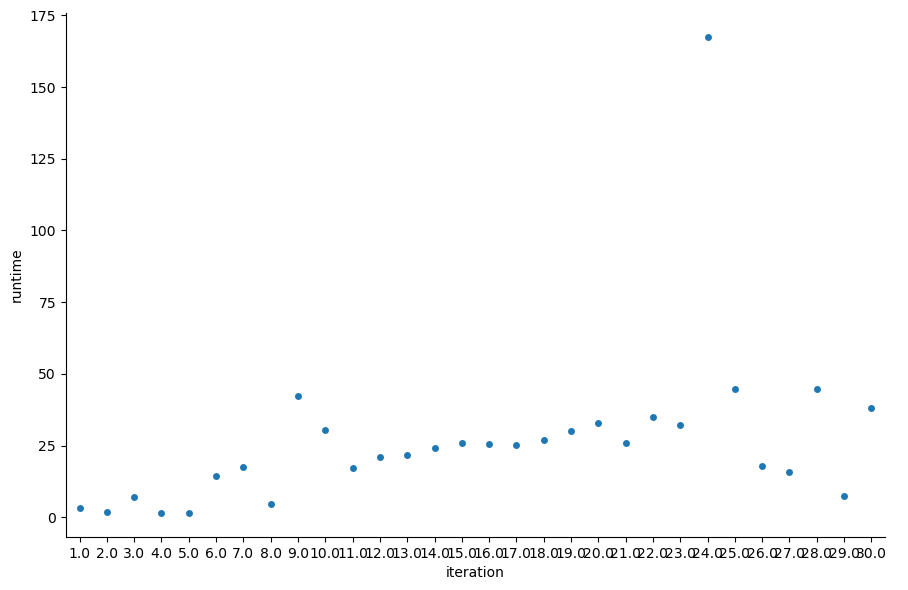

In [17]:
sns.catplot(data=df, x='iteration', y='runtime', height=6, aspect=1.5)
sns.catplot(data=df.groupby('iteration', as_index=False)['runtime'].mean(), x='iteration', y='runtime', height=6, aspect=1.5)

# Runtime Evaluation All

## Evaluate per model

In [ ]:
eqs = [50, 100, 150, 200]
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
experiments = range(1,11)

In [ ]:
runtimes_df = pd.DataFrame(columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])
frames = []
for lm in models:
    df = pd.DataFrame(columns=['samples', 'runtime', 'iteration', 'eq'])
    for eq in eqs:
        total_runtime = 0
        for ex in experiments:
            data_dict = get_data_dict(lm, eq, ex)
            total_runtime = total_runtime + float(data_dict['data']['runtime'])
            sample_list = data_dict['data']['average_sample']
            sample_df = make_sample_df(sample_list, eq=eq)
            df = pd.concat([df, sample_df], ignore_index=True)
        total_runtime = total_runtime / len(experiments)
        #print("{lm} - {e} EQs:".format(lm=lm, e=eq))
        #print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))
        runtime_arr = [[lm, eq, total_runtime, total_runtime / 60, total_runtime / 60 / 60]]
        runtimes_df = pd.concat([runtimes_df, pd.DataFrame(runtime_arr, columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])], ignore_index=True)
    frames.append(df)

In [ ]:
print(runtimes_df[['lm','eq','runtime min']].sort_values(by='eq'))


### Plot the average sample per iteration for all models

In [ ]:
models = ['roBERTa-base', 'roBERTa-large', 'BERT-base', 'BERT-large']

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['samples'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='samples', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 30])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Plot the average runtime per iteration for all models

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Runtime per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 450])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Analyse the runtime per sample

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Average Runtime per Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    df['runtime per sample'] = df['runtime'] / df['samples']
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime per sample'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime per sample', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 170])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Relate the runtime to the hypothesis size

In [ ]:
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
eqs = [50, 100, 150, 200]
#eqs = [200]
experiments = range(1,11)
background = load_background()
lookup = get_lookup(binarizer)

In [ ]:
rule_df = pd.DataFrame(columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
for lm in models:
    for eq in eqs:
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            relevant_implications = []
            for rule in all_implications:
                if rule['body'] not in negations:
                    relevant_implications.append(rule)
            data_dict = get_data_dict(lm, eq, e)
            runtime = float(data_dict['data']['runtime'])
            new_df = pd.DataFrame([[lm, eq, e, len(all_rules), len(relevant_implications) + len(negations), runtime]], columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
            rule_df = pd.concat([rule_df, new_df], ignore_index=True)

In [ ]:
rule_df['runtime per rule'] = rule_df['runtime'] / rule_df['#rules']
#print(rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean())
mean_df = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean()
mean_df['mean #rules'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#rules'].mean()['#rules']
mean_df['mean #relevant'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#relevant'].mean()['#relevant']
mean_df['mean runtime'] = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime'].mean()['runtime']
print(mean_df)

In [ ]:
sns.catplot(data=mean_df, x='eq', y='mean #rules', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='mean #relevant', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='runtime per rule', hue= 'lm')

# Runtime Evaluation roBERTa

In [17]:
eqs = [50, 100, 150, 200]
models = ['roberta-base', 'roberta-large']
experiments = range(1,11)

In [18]:
runtimes_df = pd.DataFrame(columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])
frames = []
for lm in models:
    df = pd.DataFrame(columns=['samples', 'runtime', 'iteration', 'eq'])
    for eq in eqs:
        total_runtime = 0
        for ex in experiments:
            data_dict = get_data_dict(lm, eq, ex)
            total_runtime = total_runtime + float(data_dict['data']['runtime'])
            sample_list = data_dict['data']['average_sample']
            sample_df = make_sample_df(sample_list, eq=eq)
            df = pd.concat([df, sample_df], ignore_index=True)
        total_runtime = total_runtime / len(experiments)
        #print("{lm} - {e} EQs:".format(lm=lm, e=eq))
        #print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))
        runtime_arr = [[lm, eq, total_runtime, total_runtime / 60, total_runtime / 60 / 60]]
        runtimes_df = pd.concat([runtimes_df, pd.DataFrame(runtime_arr, columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])], ignore_index=True)
    frames.append(df)

In [19]:
print(runtimes_df[['lm','eq','runtime min']].sort_values(by='eq'))

              lm   eq  runtime min
0   roberta-base   50    14.304320
4  roberta-large   50    16.812329
1   roberta-base  100    59.247497
5  roberta-large  100    60.671643
2   roberta-base  150   170.612575
6  roberta-large  150   161.509698
3   roberta-base  200   423.045764
7  roberta-large  200   361.568661


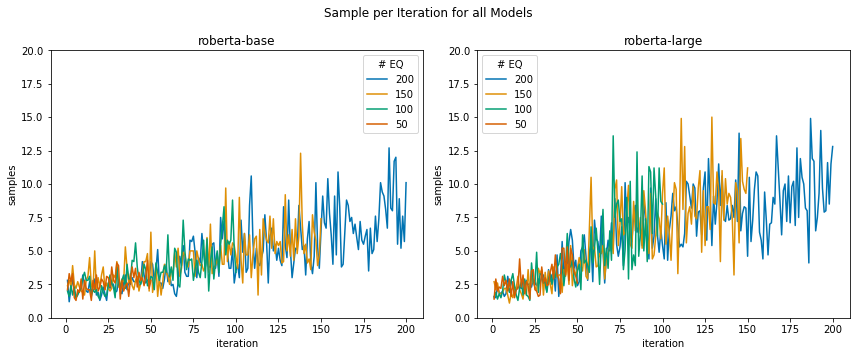

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['samples'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='samples', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 20])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

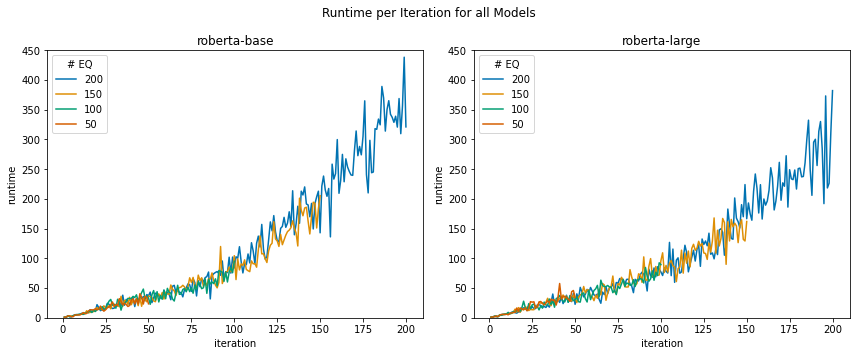

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Runtime per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='runtime', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 450])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

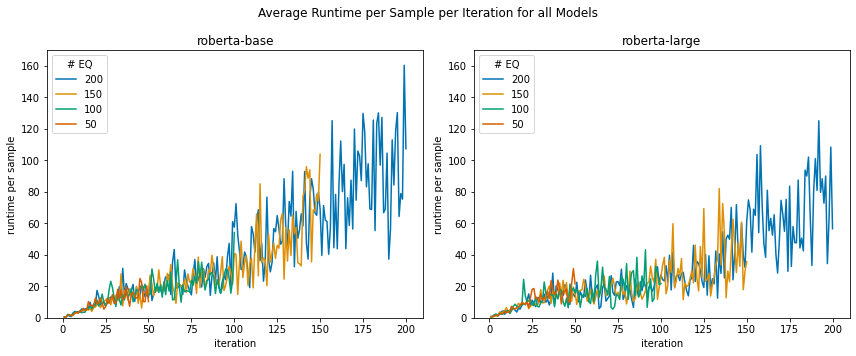

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Average Runtime per Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    df['runtime per sample'] = df['runtime'] / df['samples']
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime per sample'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='runtime per sample', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 170])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

In [30]:
background = load_background()
lookup = get_lookup(binarizer)

In [31]:
rule_df = pd.DataFrame(columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
for lm in models:
    for eq in eqs:
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            relevant_implications = []
            for rule in all_implications:
                if rule['body'] not in negations:
                    relevant_implications.append(rule)
            data_dict = get_data_dict(lm, eq, e)
            runtime = float(data_dict['data']['runtime'])
            new_df = pd.DataFrame([[lm, eq, e, len(all_rules), len(relevant_implications) + len(negations), runtime]], columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
            rule_df = pd.concat([rule_df, new_df], ignore_index=True)

In [32]:
rule_df['runtime per rule'] = rule_df['runtime'] / rule_df['#rules']
#print(rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean())
mean_df = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean()
mean_df['mean #rules'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#rules'].mean()['#rules']
mean_df['mean #relevant'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#relevant'].mean()['#relevant']
mean_df['mean runtime'] = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime'].mean()['runtime']
print(mean_df)

              lm   eq  runtime per rule  mean #rules  mean #relevant  \
0   roberta-base   50          6.769086        153.0           945.7   
1   roberta-base  100         14.718842        248.0           665.4   
2   roberta-base  150         23.615715        442.4           622.1   
3   roberta-base  200         47.711851        536.1           600.4   
4  roberta-large   50          6.354711        163.2           858.9   
5  roberta-large  100         14.614358        252.1           704.4   
6  roberta-large  150         33.017226        304.3           710.9   
7  roberta-large  200         51.478340        426.2           716.5   

   mean runtime  
0    858.259188  
1   3554.849831  
2  10236.754475  
3  25382.745822  
4   1008.739725  
5   3640.298588  
6   9690.581859  
7  21694.119684  


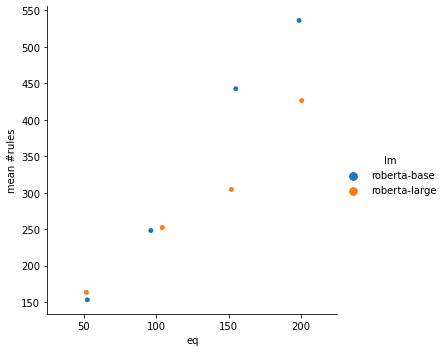

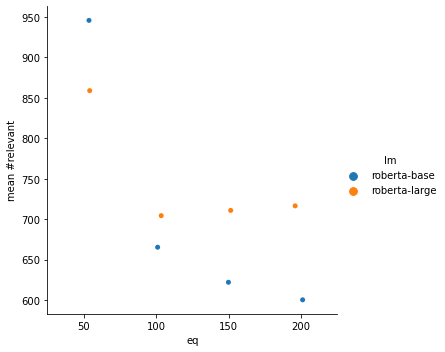

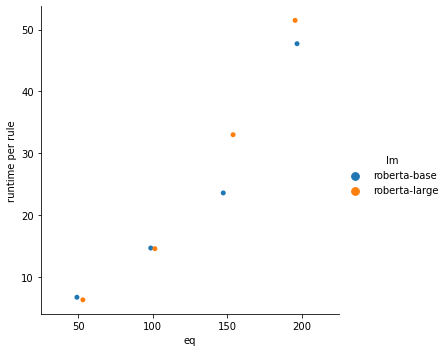

In [33]:
sns.catplot(data=mean_df, x='eq', y='mean #rules', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='mean #relevant', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='runtime per rule', hue= 'lm')

# Runtime Evaluation with Hypothesis Size

In [7]:
data = pd.read_csv('output.txt').to_numpy()
frame = pd.DataFrame(columns=['iteration', 'value', 'type'])
for row in data:
    new_rows = [[row[0], row[1], 'len_h'], [row[0], row[2], 'runtime']]
    new_df = pd.DataFrame(new_rows, columns= ['iteration', 'value', 'type'])
    frame = pd.concat([frame, new_df], ignore_index=True)
print(frame)

     iteration        value     type
0          5.0    75.000000    len_h
1          5.0     0.453650  runtime
2         10.0   143.000000    len_h
3         10.0     7.091560  runtime
4         15.0   144.000000    len_h
..         ...          ...      ...
173      435.0  1552.102194  runtime
174      440.0  1138.000000    len_h
175      440.0  1740.692678  runtime
176      445.0  1201.000000    len_h
177      445.0  1953.759390  runtime

[178 rows x 3 columns]


In [8]:
data = pd.read_csv('output.txt')
data['runtime'] = (data['runtime'] - data['runtime'].mean())/ data['runtime'].std()
data['len_h'] = (data['len_h'] - data['len_h'].mean())/ data['len_h'].std()
data = data.to_numpy()
frame_norm = pd.DataFrame(columns=['iteration', 'value', 'type'])
for row in data:
    new_rows = [[row[0], row[1], 'len_h'], [row[0], row[2], 'runtime']]
    new_df = pd.DataFrame(new_rows, columns= ['iteration', 'value', 'type'])
    frame_norm = pd.concat([frame_norm, new_df], ignore_index=True)
print(frame_norm)

     iteration     value     type
0          5.0 -1.920621    len_h
1          5.0 -0.891741  runtime
2         10.0 -1.675939    len_h
3         10.0 -0.878787  runtime
4         15.0 -1.672341    len_h
..         ...       ...      ...
173      435.0  2.136283  runtime
174      440.0  1.904328    len_h
175      440.0  2.504315  runtime
176      445.0  2.131018    len_h
177      445.0  2.920112  runtime

[178 rows x 3 columns]


<AxesSubplot:xlabel='iteration', ylabel='value'>

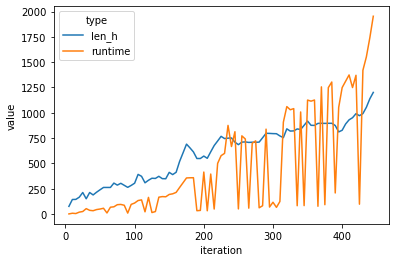

In [9]:
sns.lineplot(data=frame, x='iteration', y='value', hue='type')

<AxesSubplot:xlabel='iteration', ylabel='value'>

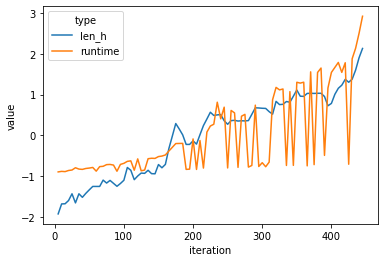

In [10]:
sns.lineplot(data=frame_norm, x='iteration', y='value', hue='type')

# Format All Rules and save to file

In [ ]:
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
#eqs = [50, 100, 150]
eqs = [200]
experiments = range(1,11)
background = load_background()
lookup = get_lookup(binarizer)

In [ ]:
for lm in models:
    for eq in eqs:
        all_negations = []
        all_implications = []
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            all_negations = [*all_negations, *negations]
            all_implications = [*all_implications, *implications]

        relevant_implications = []
        for rule in all_implications:
            if rule['body'] not in all_negations:
                relevant_implications.append(rule)

        negations_count = count_lists(all_negations)
        implications_count = count_lists(relevant_implications)
        
        filename_latex = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'_latex.txt'

        for rule, count in sorted(negations_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=negation_to_latex(rule, lookup))
                f.write(line + '\n')

        for rule, count in sorted(implications_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=implication_to_latex(rule, lookup))
                f.write(line + '\n')